In [1]:
import pandas as pd
import os 
import numpy as np

# DataViz
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

# import scikit-learn dataset library
from sklearn import datasets

# import train_test_split function
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
df = pd.read_excel("/Users/negin/Desktop/Misagh_paper/Amelyo.xlsx")
print(df)

     Reservoir_A  Conduit_A  Booster_A  Reservoir_B  Conduit_B  Booster_B  \
0         27.801     17.285     10.516       32.800     20.855     11.945   
1         46.327     31.586     14.741       38.244     26.209     12.035   
2         46.174     32.822     13.352       46.158     32.965     13.193   
3         59.500     38.000     21.500       69.200     42.100     27.100   
4         40.300     24.500     15.800       34.100     22.700     11.400   
..           ...        ...        ...          ...        ...        ...   
102        7.000      4.600      2.400        4.500      4.300      0.200   
103       10.300      6.700      3.600       11.400      7.000      4.400   
104       11.800      5.700      6.100        7.400      2.800      4.600   
105        2.200      1.800      0.400        3.500      3.700     -0.200   
106        3.100      3.300     -0.200        6.100      6.500     -0.400   

     Reservoir_C  Conduit_C  Booster_C  Reservoir_D  ...  \
0          0.71

In [3]:
df.head()

,Reservoir_A,Conduit_A,Booster_A,Reservoir_B,Conduit_B,Booster_B,Reservoir_C,Conduit_C,Booster_C,Reservoir_D,...,peak_sys_strain_rate_circumf_K,peak_diast_strain_rate_radial_K,peak_diast_strain_rate_circumf_K,peak_strain_radial_L,peak_strain_long_L,peak_sys_strain_rate_radial_L,peak_sys_strain_rate_radial_L.1,peak_diast_strain_rate_radial_L,peak_diast_Strain_rate_long_L,status
0,27.801,17.285,10.516,32.800,20.855,11.945,0.710,-1.337,-1.040,0.730,...,-0.38,-0.61,0.38,52.34,-16.19,1.97,-0.79,-3.36,0.94,1
1,46.327,31.586,14.741,38.244,26.209,12.035,3.928,-2.415,-1.686,3.122,...,-0.45,-0.81,0.46,36.58,-12.18,2.99,0.97,-3.31,1.08,1
2,46.174,32.822,13.352,46.158,32.965,13.193,1.974,-3.060,-1.299,2.070,...,-0.38,-0.70,0.47,21.46,-11.28,2.26,-1.06,-0.98,0.74,1
3,59.500,38.000,21.500,69.200,42.100,27.100,3.500,-2.900,-2.100,3.900,...,-0.40,-0.69,0.51,34.71,-16.28,2.58,-1.06,-2.14,1.08,1
4,40.300,24.500,15.800,34.100,22.700,11.400,2.300,-1.900,-2.200,1.800,...,-0.58,-0.59,0.41,37.51,-13.37,2.12,-1.06,-2.01,0.77,1


In [4]:
correlation_matrix = df.corr()
correlation_matrix["Reservoir_A"]

Reservoir_A                         1.000000
Conduit_A                           0.908515
Booster_A                           0.799115
Reservoir_B                         0.971108
Conduit_B                           0.889932
Booster_B                           0.771271
Reservoir_C                         0.749762
Conduit_C                          -0.897936
Booster_C                          -0.732740
Reservoir_D                         0.750166
Conduit_D                          -0.864909
Booster_D                          -0.789229
GLS_LA_R_E                          0.731362
GLS_LA_C_E                          0.702334
GLS_LA_B_E                          0.652665
4Ch_LS_LA_R_F                       0.550679
4Ch_LS_LA_C_F                       0.480093
4Ch_LS_LA_B_F                       0.558615
2Ch_LS_LA_R_G                       0.704958
2Ch_LS_LA_C_G                       0.690616
2Ch_LS_LA_B_G                       0.622235
GLSR_LA_R_H                         0.682375
GLSR_LA_C_

In [5]:
df_corr = df.corr().style.background_gradient(cmap='coolwarm')
df_corr

,Reservoir_A,Conduit_A,Booster_A,Reservoir_B,Conduit_B,Booster_B,Reservoir_C,Conduit_C,Booster_C,Reservoir_D,Conduit_D,Booster_D,GLS_LA_R_E,GLS_LA_C_E,GLS_LA_B_E,4Ch_LS_LA_R_F,4Ch_LS_LA_C_F,4Ch_LS_LA_B_F,2Ch_LS_LA_R_G,2Ch_LS_LA_C_G,2Ch_LS_LA_B_G,GLSR_LA_R_H,GLSR_LA_C_H,GLSR_LA_B_H,4Ch_LSR_LA_R_I,4Ch_LSR_LA_C_I,4Ch_LSR_LA_B_I,2Ch_LSR_LA_R_J,2Ch_LSR_LA_C_J,2Ch_LSR_LA_B_J,peak_strain_radial_K,peak_strain_circumf_K,peak_sys_strain_rate_radial_K,peak_sys_strain_rate_circumf_K,peak_diast_strain_rate_radial_K,peak_diast_strain_rate_circumf_K,peak_strain_radial_L,peak_strain_long_L,peak_sys_strain_rate_radial_L,peak_sys_strain_rate_radial_L.1,peak_diast_strain_rate_radial_L,peak_diast_Strain_rate_long_L,status
Reservoir_A,1.000000,0.908515,0.799115,0.971108,0.889932,0.771271,0.749762,-0.897936,-0.732740,0.750166,-0.864909,-0.789229,0.731362,0.702334,0.652665,0.550679,0.480093,0.558615,0.704958,0.690616,0.622235,0.682375,-0.654959,-0.632667,0.506359,-0.410408,-0.271926,0.630521,-0.655237,-0.620698,0.331961,-0.339761,0.335115,-0.183939,-0.352000,0.244362,0.450898,-0.298853,0.209417,0.059581,-0.346474,0.160018,-0.729007
Conduit_A,0.908515,1.000000,0.474805,0.869287,0.974604,0.454909,0.697089,-0.876602,-0.601446,0.677999,-0.828849,-0.655729,0.647944,0.640162,0.558768,0.477923,0.439047,0.454358,0.633238,0.639671,0.537184,0.600830,-0.561396,-0.549341,0.435775,-0.319510,-0.188805,0.560598,-0.581898,-0.540531,0.329836,-0.331843,0.311598,-0.151955,-0.339325,0.249878,0.395266,-0.265287,0.171495,0.036869,-0.300032,0.139020,-0.611410
Booster_A,0.799115,0.474805,1.000000,0.794700,0.472203,0.969978,0.576243,-0.630060,-0.677996,0.604558,-0.629200,-0.718876,0.608194,0.558252,0.570741,0.472252,0.379513,0.522869,0.573739,0.534277,0.537705,0.572803,-0.571793,-0.542184,0.439542,-0.404721,-0.301097,0.521469,-0.542880,-0.529650,0.224638,-0.238181,0.257520,-0.168794,-0.253194,0.155173,0.381011,-0.247775,0.194345,0.072446,-0.298085,0.137022,-0.655799
Reservoir_B,0.971108,0.869287,0.794700,1.000000,0.899693,0.816336,0.729635,-0.873038,-0.724460,0.770988,-0.891507,-0.807193,0.717416,0.687745,0.645689,0.521497,0.455717,0.524336,0.684252,0.666367,0.608422,0.680325,-0.650568,-0.634118,0.500977,-0.397195,-0.244600,0.598540,-0.654716,-0.636904,0.314656,-0.330035,0.306882,-0.158890,-0.330943,0.233986,0.409745,-0.276309,0.188171,0.034928,-0.327223,0.146628,-0.722375
Conduit_B,0.889932,0.974604,0.472203,0.899693,1.000000,0.482326,0.677653,-0.852053,-0.597564,0.694013,-0.848298,-0.667558,0.644012,0.639001,0.554594,0.454670,0.423900,0.420585,0.628054,0.634587,0.532613,0.599551,-0.558734,-0.551354,0.433335,-0.303533,-0.157855,0.535133,-0.584942,-0.557600,0.317486,-0.329088,0.289217,-0.121237,-0.324641,0.242912,0.367506,-0.251117,0.155786,0.017544,-0.284727,0.125678,-0.612704
Booster_B,0.771271,0.454909,0.969978,0.816336,0.482326,1.000000,0.567570,-0.624588,-0.663152,0.628908,-0.666621,-0.736567,0.587561,0.534648,0.561933,0.444925,0.353633,0.495722,0.542123,0.497588,0.516233,0.571957,-0.566247,-0.543001,0.431977,-0.395457,-0.281988,0.493069,-0.539896,-0.540329,0.211360,-0.226870,0.233163,-0.158439,-0.234576,0.148147,0.335995,-0.222221,0.171487,0.046880,-0.279924,0.127958,-0.638937
Reservoir_C,0.749762,0.697089,0.576243,0.729635,0.677653,0.567570,1.000000,-0.685611,-0.565083,0.971904,-0.659923,-0.609654,0.505276,0.488946,0.442840,0.372008,0.336662,0.352786,0.472310,0.450143,0.431028,0.520377,-0.467750,-0.435104,0.325688,-0.244230,-0.197569,0.463452,-0.454792,-0.423952,0.276088,-0.291571,0.286388,-0.260844,-0.302783,0.192881,0.344469,-0.191405,0.150210,0.073598,-0.279259,0.088991,-0.515396
Conduit_C,-0.897936,-0.876602,-0.630060,-0.873038,-0.852053,-0.624588,-0.685611,1.000000,0.624169,-0.677410,0.969952,0.682383,-0.753535,-0.749529,-0.639364,-0.558743,-0.508357,-0.519622,-0.725435,-0.721087,-0.628588,-0.727200,0.743916,0.685381,-0.504771,0.457272,0.288266,-0.688502,0.739190,0.687882,-0.162579,0.200555,-0.176100,0.103076,0.203976,-0.158418,-0.515640,0.337063,-0.295146,-0.00

In [6]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)

df_norm = scaler.transform(df)

In [7]:
df_corr_norm = df.corr().style.background_gradient(cmap='coolwarm')
df_corr_norm

,Reservoir_A,Conduit_A,Booster_A,Reservoir_B,Conduit_B,Booster_B,Reservoir_C,Conduit_C,Booster_C,Reservoir_D,Conduit_D,Booster_D,GLS_LA_R_E,GLS_LA_C_E,GLS_LA_B_E,4Ch_LS_LA_R_F,4Ch_LS_LA_C_F,4Ch_LS_LA_B_F,2Ch_LS_LA_R_G,2Ch_LS_LA_C_G,2Ch_LS_LA_B_G,GLSR_LA_R_H,GLSR_LA_C_H,GLSR_LA_B_H,4Ch_LSR_LA_R_I,4Ch_LSR_LA_C_I,4Ch_LSR_LA_B_I,2Ch_LSR_LA_R_J,2Ch_LSR_LA_C_J,2Ch_LSR_LA_B_J,peak_strain_radial_K,peak_strain_circumf_K,peak_sys_strain_rate_radial_K,peak_sys_strain_rate_circumf_K,peak_diast_strain_rate_radial_K,peak_diast_strain_rate_circumf_K,peak_strain_radial_L,peak_strain_long_L,peak_sys_strain_rate_radial_L,peak_sys_strain_rate_radial_L.1,peak_diast_strain_rate_radial_L,peak_diast_Strain_rate_long_L,status
Reservoir_A,1.000000,0.908515,0.799115,0.971108,0.889932,0.771271,0.749762,-0.897936,-0.732740,0.750166,-0.864909,-0.789229,0.731362,0.702334,0.652665,0.550679,0.480093,0.558615,0.704958,0.690616,0.622235,0.682375,-0.654959,-0.632667,0.506359,-0.410408,-0.271926,0.630521,-0.655237,-0.620698,0.331961,-0.339761,0.335115,-0.183939,-0.352000,0.244362,0.450898,-0.298853,0.209417,0.059581,-0.346474,0.160018,-0.729007
Conduit_A,0.908515,1.000000,0.474805,0.869287,0.974604,0.454909,0.697089,-0.876602,-0.601446,0.677999,-0.828849,-0.655729,0.647944,0.640162,0.558768,0.477923,0.439047,0.454358,0.633238,0.639671,0.537184,0.600830,-0.561396,-0.549341,0.435775,-0.319510,-0.188805,0.560598,-0.581898,-0.540531,0.329836,-0.331843,0.311598,-0.151955,-0.339325,0.249878,0.395266,-0.265287,0.171495,0.036869,-0.300032,0.139020,-0.611410
Booster_A,0.799115,0.474805,1.000000,0.794700,0.472203,0.969978,0.576243,-0.630060,-0.677996,0.604558,-0.629200,-0.718876,0.608194,0.558252,0.570741,0.472252,0.379513,0.522869,0.573739,0.534277,0.537705,0.572803,-0.571793,-0.542184,0.439542,-0.404721,-0.301097,0.521469,-0.542880,-0.529650,0.224638,-0.238181,0.257520,-0.168794,-0.253194,0.155173,0.381011,-0.247775,0.194345,0.072446,-0.298085,0.137022,-0.655799
Reservoir_B,0.971108,0.869287,0.794700,1.000000,0.899693,0.816336,0.729635,-0.873038,-0.724460,0.770988,-0.891507,-0.807193,0.717416,0.687745,0.645689,0.521497,0.455717,0.524336,0.684252,0.666367,0.608422,0.680325,-0.650568,-0.634118,0.500977,-0.397195,-0.244600,0.598540,-0.654716,-0.636904,0.314656,-0.330035,0.306882,-0.158890,-0.330943,0.233986,0.409745,-0.276309,0.188171,0.034928,-0.327223,0.146628,-0.722375
Conduit_B,0.889932,0.974604,0.472203,0.899693,1.000000,0.482326,0.677653,-0.852053,-0.597564,0.694013,-0.848298,-0.667558,0.644012,0.639001,0.554594,0.454670,0.423900,0.420585,0.628054,0.634587,0.532613,0.599551,-0.558734,-0.551354,0.433335,-0.303533,-0.157855,0.535133,-0.584942,-0.557600,0.317486,-0.329088,0.289217,-0.121237,-0.324641,0.242912,0.367506,-0.251117,0.155786,0.017544,-0.284727,0.125678,-0.612704
Booster_B,0.771271,0.454909,0.969978,0.816336,0.482326,1.000000,0.567570,-0.624588,-0.663152,0.628908,-0.666621,-0.736567,0.587561,0.534648,0.561933,0.444925,0.353633,0.495722,0.542123,0.497588,0.516233,0.571957,-0.566247,-0.543001,0.431977,-0.395457,-0.281988,0.493069,-0.539896,-0.540329,0.211360,-0.226870,0.233163,-0.158439,-0.234576,0.148147,0.335995,-0.222221,0.171487,0.046880,-0.279924,0.127958,-0.638937
Reservoir_C,0.749762,0.697089,0.576243,0.729635,0.677653,0.567570,1.000000,-0.685611,-0.565083,0.971904,-0.659923,-0.609654,0.505276,0.488946,0.442840,0.372008,0.336662,0.352786,0.472310,0.450143,0.431028,0.520377,-0.467750,-0.435104,0.325688,-0.244230,-0.197569,0.463452,-0.454792,-0.423952,0.276088,-0.291571,0.286388,-0.260844,-0.302783,0.192881,0.344469,-0.191405,0.150210,0.073598,-0.279259,0.088991,-0.515396
Conduit_C,-0.897936,-0.876602,-0.630060,-0.873038,-0.852053,-0.624588,-0.685611,1.000000,0.624169,-0.677410,0.969952,0.682383,-0.753535,-0.749529,-0.639364,-0.558743,-0.508357,-0.519622,-0.725435,-0.721087,-0.628588,-0.727200,0.743916,0.685381,-0.504771,0.457272,0.288266,-0.688502,0.739190,0.687882,-0.162579,0.200555,-0.176100,0.103076,0.203976,-0.158418,-0.515640,0.337063,-0.295146,-0.00

In [8]:
# Export png of the correlation table:

# import dataframe_image as dfi
# dfi.export(df_corr,"mytable.png",max_rows=-1, max_cols = -1)

# SVM:

In [9]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X = df.iloc[:, :42].values    # pandas DataFrame to Numpy array
y = df.iloc[:, 42].values

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [11]:
X

array([[27.801, 17.285, 10.516, ..., -0.79 , -3.36 ,  0.94 ],
       [46.327, 31.586, 14.741, ...,  0.97 , -3.31 ,  1.08 ],
       [46.174, 32.822, 13.352, ..., -1.06 , -0.98 ,  0.74 ],
       ...,
       [11.8  ,  5.7  ,  6.1  , ..., -1.63 , -2.93 ,  1.75 ],
       [ 2.2  ,  1.8  ,  0.4  , ..., -0.62 , -0.7  ,  0.44 ],
       [ 3.1  ,  3.3  , -0.2  , ..., -4.68 , -2.18 ,  1.19 ]])

In [12]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [13]:
print(f'Train: {X_train.shape, y_train.shape}  \nTest: {X_test.shape, y_test.shape}')

Train: ((74, 42), (74,))  
Test: ((33, 42), (33,))


In [14]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
X_train

array([[-1.05717793, -0.97443901, -0.80211784, ..., -0.73261174,
        -0.37610298,  1.21241773],
       [ 1.55089084,  1.1508218 ,  1.57493222, ..., -0.46944053,
        -4.49530291,  1.52185606],
       [ 0.69834999,  0.21277565,  1.14559719, ..., -0.56639834,
        -0.83245749,  0.93938391],
       ...,
       [-0.80999153, -0.00707892, -1.67125949, ..., -0.69105839,
        -0.18395371,  0.62994559],
       [-0.47704658, -0.33686077, -0.50891343, ..., -0.02620481,
         0.41651275, -0.06174008],
       [-0.99664248, -0.95245356, -0.70787356, ..., -0.58024946,
        -1.66710587,  3.66972208]])

In [16]:
X_test

array([[-1.10762413, -0.69595656, -1.30475397, ...,  0.09845523,
         0.48256406, -0.3711784 ],
       [-0.23994942, -0.27823289, -0.10052157, ..., -1.70218987,
        -0.34007499,  0.0656757 ],
       [-0.52749278, -0.78389839,  0.02513747, ..., -0.55254723,
         0.03821888,  0.59354108],
       ...,
       [ 0.46629745,  0.83569692, -0.2261806 , ...,  0.5001376 ,
         0.72275065, -0.80803251],
       [ 0.6768599 ,  1.01319284, -0.04271841, ...,  0.05690188,
         0.79480662, -0.62600997],
       [ 0.78915315,  1.19479271, -0.06910681, ...,  0.08460411,
        -0.20797237,  0.75736137]])

In [17]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

1.0


In [18]:
y_pred

array([3, 1, 3, 2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3,
       3, 2, 2, 1, 3, 3, 2, 3, 1, 1, 1])

In [19]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='linear')

# traininf the model
classifier1.fit(X_train,y_train)

# testing the model
y_pred = classifier1.predict(X_test)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test, y_pred))

1.0


In [20]:
# import some data to play with
from sklearn import svm

# we only take the first two features.
X = df.iloc[:, :2].values
y = df.iloc[:, 42].values

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# SVM regularization parameter
C = 1.0 

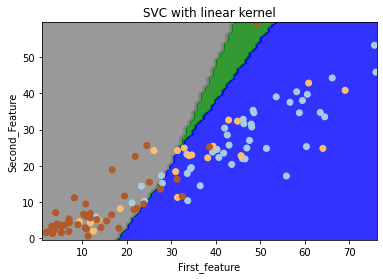

In [21]:
from matplotlib.colors import ListedColormap


#kernel is set to be linear
svc = svm.SVC(kernel='linear', C=1,gamma='auto').fit(X, y)

#Ploting part
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
plt.xlabel('First_feature')
plt.ylabel('Second_Feature')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [22]:
# Kernel is set to be poly
# svc = svm.SVC(kernel='poly', C=1,gamma='auto').fit(X, y)

# #ploting part
# plt.subplot(1, 1, 1)
# Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)
# plt.contourf(xx, yy, Z, cmap= ListedColormap(('blue', 'green', 'gray')), alpha=0.8)
# plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.Paired)
# plt.xlabel('First_feature')
# plt.ylabel('Second_Feature')
# plt.xlim(xx.min(), xx.max())
# plt.title('SVC with kernel poly')
# plt.show()

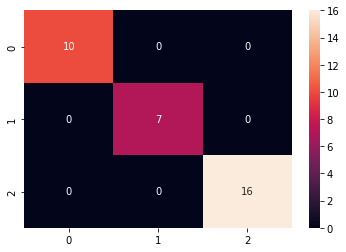

In [23]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm = confusion_matrix(y_test, y_pred)

# true Write data values in each cell of the matrix
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [24]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         7
           3       1.00      1.00      1.00        16

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [25]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

/Users/negin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/negin/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     62.61
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           1.42e-18
Time:                        13:43:37   Log-Likelihood:                -98.469
No. Observations:                 107   AIC:                             202.9
Df Residuals:                     104   BIC:                             211.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0521      0.112     27.199      0.0

# PCA:

In [26]:
from sklearn.decomposition import PCA
# initialize and compute pca
pca = PCA()
X_pca = pca.fit_transform(df)

In [27]:
X_pca

array([[-1.67119235e+00, -9.82824807e+00, -1.62642864e+01, ...,
         1.56721913e-14,  2.55403597e-14, -1.28044977e-14],
       [ 3.01084194e+01, -5.78897362e+00,  1.31181318e+01, ...,
         8.82532364e-15,  7.48033380e-16, -7.86420894e-15],
       [ 3.17432084e+01,  1.94338730e+00,  1.47276972e+00, ...,
         1.52089780e-16,  3.19239022e-15,  1.32607749e-14],
       ...,
       [-4.27421976e+01, -2.14358804e+01, -6.94449934e+00, ...,
         3.05581888e-15, -1.49405614e-15, -9.57311312e-16],
       [-5.69728001e+01, -1.51582370e+01,  8.51473374e+00, ...,
         3.65727436e-15, -1.19994240e-15, -1.64223571e-15],
       [-6.50035631e+01, -1.24000377e+01, -6.25373826e+00, ...,
         4.45689181e-15, -3.30507465e-15, -2.83778511e-15]])

In [28]:
# get basic info
n_components = len(pca.explained_variance_ratio_)
explained_variance = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance)
idx = np.arange(n_components)+1

df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                     index=['explained variance', 'cumulative'], 
                                     columns=idx).T

mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

# DISPLAY info about PCs
print('PCA Overview')
print('='*40)
print("Total: {} components".format(n_components))
print('-'*40)
print('Mean explained variance:', round(mean_explained_variance,3))
print('-'*40)
print(df_explained_variance.head(20))
print('-'*40)

PCA Overview
Total: 43 components
----------------------------------------
Mean explained variance: 0.023
----------------------------------------
    explained variance  cumulative
1             0.618422    0.618422
2             0.130281    0.748703
3             0.078403    0.827106
4             0.056802    0.883908
5             0.052435    0.936342
6             0.032424    0.968766
7             0.013120    0.981886
8             0.005140    0.987027
9             0.003991    0.991018
10            0.003002    0.994020
11            0.001489    0.995509
12            0.001135    0.996644
13            0.000804    0.997447
14            0.000455    0.997903
15            0.000319    0.998222
16            0.000303    0.998525
17            0.000233    0.998758
18            0.000222    0.998980
19            0.000195    0.999176
20            0.000141    0.999317
----------------------------------------


Limit scree plot to nth component (0 for all) > 0


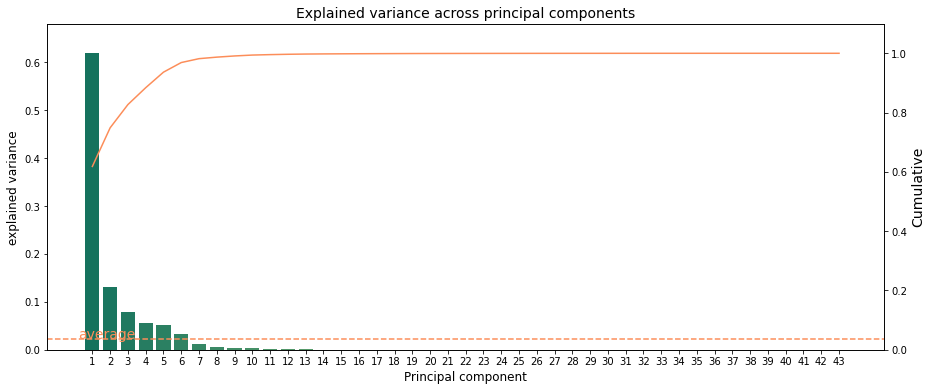

In [29]:
#limit plot to x PC
limit = int(input("Limit scree plot to nth component (0 for all) > "))
if limit > 0:
    limit_df = limit
else:
    limit_df = n_components

df_explained_variance_limited = df_explained_variance.iloc[:limit_df,:]

#make scree plot
fig, ax1 = plt.subplots(figsize=(15,6))

ax1.set_title('Explained variance across principal components', fontsize=14)
ax1.set_xlabel('Principal component', fontsize=12)
ax1.set_ylabel('Explained variance', fontsize=12)

ax2 = sns.barplot(x=idx[:limit_df], y='explained variance', data=df_explained_variance_limited, palette='summer')
ax2 = ax1.twinx()
ax2.grid(False)

ax2.set_ylabel('Cumulative', fontsize=14)
ax2 = sns.lineplot(x=idx[:limit_df]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) #label y axis

max_y1 = max(df_explained_variance_limited.iloc[:,0])
max_y2 = max(df_explained_variance_limited.iloc[:,1])
ax1.set(ylim=(0, max_y1+max_y1*.1))
ax2.set(ylim=(0, max_y2+max_y2*.1))

plt.show()

In [30]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

#plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

def do_pca(df, feature_names=None, top_k=10, top_pc=10):
    """Conduct a PCA on standardized data. Show scree plot and heatmap of factor loadings. 
        Returns a PCA object and the PCA tranformation of the data.
     
    Input
        df: dataframe containing standardized data
        feature_names: list of features 
        top_k: Top-k variables to list for factor loadings
        top_pc: Show PC up to top_pc in scree plot and heatmap 
        
    Return 
        tuple: (pca object, pca transformation)
    """
    # store feature names if not given
    if feature_names is None:
        feature_names = list(df.columns)
    
    #---------------
    ### 1.
    # initialize and compute pca
    pca = PCA()
    X_pca = pca.fit_transform(df)
    
    
    #---------------
    ### 2.
    # print explained variance for each component
    n_components = len(pca.explained_variance_ratio_)
    explained_variance = pca.explained_variance_ratio_
    cum_explained_variance = np.cumsum(explained_variance)
    idx = np.arange(n_components)+1

    df_explained_variance = pd.DataFrame([explained_variance, cum_explained_variance], 
                                         index=['explained variance', 'cumulative'], 
                                         columns=idx).T

    mean_explained_variance = df_explained_variance.iloc[:,0].mean() # calculate mean explained variance

    print('PCA Overview')
    print('='*40)
    print("Total: {} components".format(n_components))
    print('-'*40)
    print('Mean explained variance:', round(mean_explained_variance,3))
    print('-'*40)
    print(df_explained_variance.head(20))
    print('-'*40)
    
    
    #---------------
    ### 3. 
    # Explained variance plot (scree plot)
    df_explained_variance_limited = df_explained_variance.iloc[:top_pc,:]

    fig, ax1 = plt.subplots(figsize=(15,6))

    ax1.set_title('Explained variance across principal components', fontsize=14)
    ax1.set_xlabel('Principal component', fontsize=12)
    ax1.set_ylabel('Explained variance', fontsize=12)

    ax2 = sns.barplot(x=idx[:top_pc], y='explained variance', data=df_explained_variance_limited, palette='YlGnBu')
    ax2 = ax1.twinx()
    ax2.grid(False)

    ax2.set_ylabel('Cumulative', fontsize=14)
    ax2 = sns.lineplot(x=idx[:top_pc]-1, y='cumulative', data=df_explained_variance_limited, color='#fc8d59')

    ax1.axhline(mean_explained_variance, ls='--', color='#fc8d59') #plot mean
    #label y axis
    ax1.text(-.8, mean_explained_variance+(mean_explained_variance*.05), "average", color='#fc8d59', fontsize=14) 

    max_y1 = max(df_explained_variance_limited.iloc[:,0])
    max_y2 = max(df_explained_variance_limited.iloc[:,1])
    ax1.set(ylim=(0, max_y1+max_y1*.1))
    ax2.set(ylim=(0, max_y2+max_y2*.1))

    plt.show()
    
    
    #---------------
    ### 4. 
    # Correlations of features with components
    df_c = pd.DataFrame(pca.components_, columns=feature_names).T

    print("Factor Loadings of 1st PC")
    print('='*40,'\n')
    print('Top {} highest'.format(top_k))
    print('-'*40)
    print(df_c.iloc[:,0].sort_values(ascending=False)[:top_k], '\n')

    print('Top {} lowest'.format(top_k))
    print('-'*40)
    print(df_c.iloc[:,0].sort_values()[:top_k])
    
    # Plot heatmap
    size_xaxis = round(top_pc * 1.5)
    size_yaxis = round(n_components * 0.5)

    fig, ax = plt.subplots(figsize=(size_xaxis,size_yaxis))
    sns.heatmap(df_c.iloc[:,:top_pc], annot=True, cmap="YlGnBu", ax=ax)
    plt.show()
    
    #---------------
    ### 5.
    # Pca object and transformed data
    return pca, pd.DataFrame(X_pca)

PCA Overview
Total: 43 components
----------------------------------------
Mean explained variance: 0.023
----------------------------------------
    explained variance  cumulative
1             0.618422    0.618422
2             0.130281    0.748703
3             0.078403    0.827106
4             0.056802    0.883908
5             0.052435    0.936342
6             0.032424    0.968766
7             0.013120    0.981886
8             0.005140    0.987027
9             0.003991    0.991018
10            0.003002    0.994020
11            0.001489    0.995509
12            0.001135    0.996644
13            0.000804    0.997447
14            0.000455    0.997903
15            0.000319    0.998222
16            0.000303    0.998525
17            0.000233    0.998758
18            0.000222    0.998980
19            0.000195    0.999176
20            0.000141    0.999317
----------------------------------------


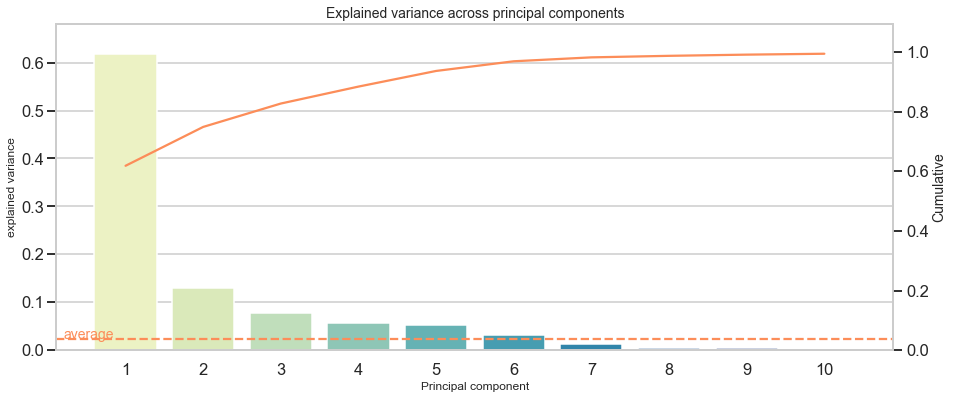

Factor Loadings of 1st PC

Top 10 highest
----------------------------------------
2Ch_LS_LA_R_G           0.408101
Reservoir_A             0.356312
Reservoir_B             0.356275
GLS_LA_R_E              0.343307
4Ch_LS_LA_R_F           0.280996
2Ch_LS_LA_C_G           0.222230
Conduit_A               0.220135
peak_strain_radial_L    0.219918
Conduit_B               0.215068
GLS_LA_C_E              0.197567
Name: 0, dtype: float64 

Top 10 lowest
----------------------------------------
peak_strain_long_L      -0.052588
peak_strain_circumf_K   -0.038327
2Ch_LSR_LA_C_J          -0.024072
2Ch_LSR_LA_B_J          -0.022410
GLSR_LA_C_H             -0.020308
Conduit_C               -0.019110
GLSR_LA_B_H             -0.018839
Conduit_D               -0.018831
4Ch_LSR_LA_B_I          -0.016609
4Ch_LSR_LA_C_I          -0.015679
Name: 0, dtype: float64


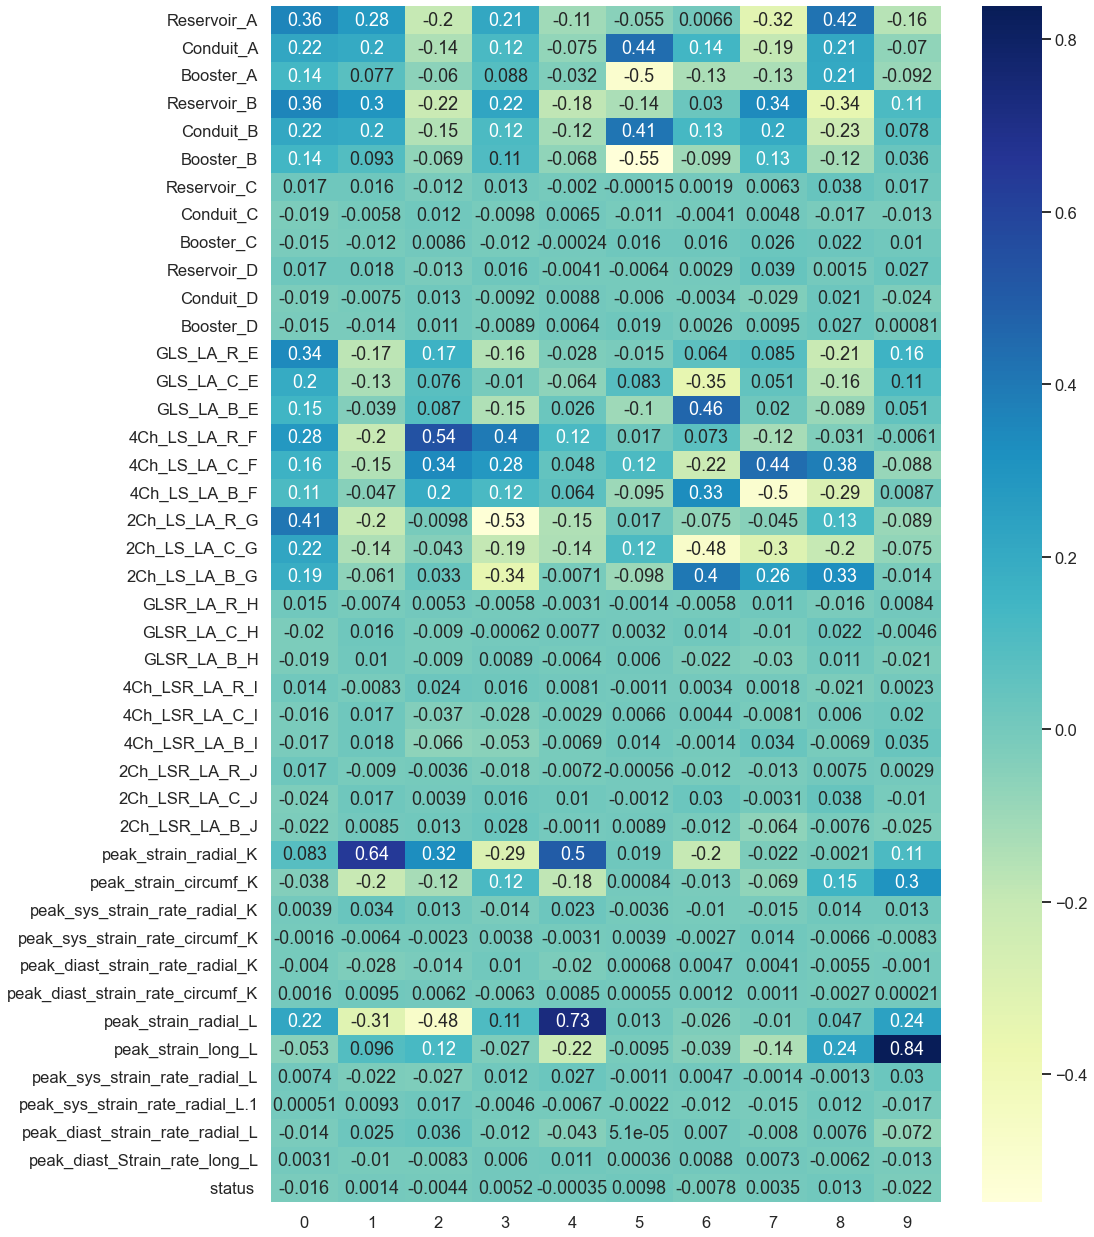

In [31]:
pca, X_pca = do_pca(df, top_pc=10, top_k=10)

# Top 10 parameters:

In [32]:
import pandas as pd
df10 = pd.read_excel("/Users/negin/Desktop/Misagh_paper/tentopAmelyo.xlsx")
print(df10)

     Reservoir_A  Conduit_A  Reservoir_B  Conduit_B  GLS_LA_R_E  GLS_LA_C_E  \
0         27.801     17.285       32.800     20.855        21.6        12.6   
1         46.327     31.586       38.244     26.209        33.8        20.7   
2         46.174     32.822       46.158     32.965        36.9        20.9   
3         59.500     38.000       69.200     42.100        43.2        25.0   
4         40.300     24.500       34.100     22.700        63.5        39.0   
..           ...        ...          ...        ...         ...         ...   
102        7.000      4.600        4.500      4.300         1.9         2.7   
103       10.300      6.700       11.400      7.000         7.0         4.9   
104       11.800      5.700        7.400      2.800        10.3         8.6   
105        2.200      1.800        3.500      3.700        11.8         9.8   
106        3.100      3.300        6.100      6.500         2.2         2.1   

     4Ch_LS_LA_R_F  2Ch_LS_LA_R_G  2Ch_LS_LA_C_G  p

In [33]:
df10.head()

,Reservoir_A,Conduit_A,Reservoir_B,Conduit_B,GLS_LA_R_E,GLS_LA_C_E,4Ch_LS_LA_R_F,2Ch_LS_LA_R_G,2Ch_LS_LA_C_G,peak_strain_radial_L,status
0,27.801,17.285,32.800,20.855,21.6,12.6,15.3,25.4,14.1,52.34,1
1,46.327,31.586,38.244,26.209,33.8,20.7,47.0,28.3,18.2,36.58,1
2,46.174,32.822,46.158,32.965,36.9,20.9,27.4,40.8,21.2,21.46,1
3,59.500,38.000,69.200,42.100,43.2,25.0,44.6,39.6,21.6,34.71,1
4,40.300,24.500,34.100,22.700,63.5,39.0,42.8,99.8,51.3,37.51,1


In [34]:
df10_corr = df10.corr().style.background_gradient(cmap='coolwarm')
df10_corr

,Reservoir_A,Conduit_A,Reservoir_B,Conduit_B,GLS_LA_R_E,GLS_LA_C_E,4Ch_LS_LA_R_F,2Ch_LS_LA_R_G,2Ch_LS_LA_C_G,peak_strain_radial_L,status
Reservoir_A,1.000000,0.908515,0.971108,0.889932,0.731362,0.702334,0.550679,0.704958,0.690616,0.450898,-0.729007
Conduit_A,0.908515,1.000000,0.869287,0.974604,0.647944,0.640162,0.477923,0.633238,0.639671,0.395266,-0.611410
Reservoir_B,0.971108,0.869287,1.000000,0.899693,0.717416,0.687745,0.521497,0.684252,0.666367,0.409745,-0.722375
Conduit_B,0.889932,0.974604,0.899693,1.000000,0.644012,0.639001,0.454670,0.628054,0.634587,0.367506,-0.612704
GLS_LA_R_E,0.731362,0.647944,0.717416,0.644012,1.000000,0.946021,0.800743,0.943830,0.889354,0.536047,-0.852310
GLS_LA_C_E,0.702334,0.640162,0.687745,0.639001,0.946021,1.000000,0.790058,0.888160,0.928735,0.527873,-0.774995
4Ch_LS_LA_R_F,0.550679,0.477923,0.521497,0.454670,0.800743,0.790058,1.000000,0.600568,0.591070,0.379935,-0.662115
2Ch_LS_LA_R_G,0.704958,0.633238,0.684252,0.628054,0.943830,0.888160,0.600568,1.000000,0.941669,0.521006,-0.798076
2Ch_LS_LA_C_G,0.690616,0.639671,0.666367,0.634587,0.889354,0.928735,0.591070,0.941669,1.000000,0.518599,-0.734890
peak_strain_radial_L,0.450898,0.395266,0.409745,0.367506,0.536047,0.527873,0.379935,0.521006,0.518599,1.000000,-0.466480


In [35]:
# Export png of the correlation table:

# import dataframe_image as dfi
# dfi.export(df10_corr,"toptenvar.png",max_rows=-1, max_cols = -1)

# SVM top 10 parameters:

In [36]:
# Need to define distances on the vectors of the independent variables, so we should first get our pandas DataFrame into a NumPy array using the .values attribute
X10 = df10.iloc[:, :10].values    # pandas DataFrame to Numpy array
y10 = df10.iloc[:, 10].values

In [37]:
# Split dataset into training set and test set
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y10, test_size=0.3, random_state=1)

In [38]:
X10

array([[27.801, 17.285, 32.8  , ..., 25.4  , 14.1  , 52.34 ],
       [46.327, 31.586, 38.244, ..., 28.3  , 18.2  , 36.58 ],
       [46.174, 32.822, 46.158, ..., 40.8  , 21.2  , 21.46 ],
       ...,
       [11.8  ,  5.7  ,  7.4  , ..., 10.5  ,  8.6  , 44.87 ],
       [ 2.2  ,  1.8  ,  3.5  , ..., 10.8  ,  8.3  , 17.73 ],
       [ 3.1  ,  3.3  ,  6.1  , ...,  0.3  ,  0.7  , 32.39 ]])

In [39]:
y10

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [40]:
print(f'Train: {X_train10.shape, y_train10.shape}  \nTest: {X_test10.shape, y_test10.shape}')

Train: ((74, 10), (74,))  
Test: ((33, 10), (33,))


In [41]:
# Perform feature scaling 
from sklearn.preprocessing import StandardScaler
scaler10 = StandardScaler()
scaler.fit(X_train10)

X_train10 = scaler.transform(X_train10)
X_test10 = scaler.transform(X_test10)

In [42]:
X_train10

array([[-1.05717793e+00, -9.74439013e-01, -1.21685571e+00,
        -1.17077946e+00, -8.59652870e-01, -6.03561288e-01,
        -5.22015285e-01, -8.38269202e-01, -5.83920294e-01,
         3.94385745e-01],
       [ 1.55089084e+00,  1.15082180e+00,  1.28137546e+00,
         9.22265156e-01,  9.94301152e-01,  1.06915880e+00,
        -9.32010603e-02,  1.26017069e+00,  1.43012701e+00,
         4.70505897e+00],
       [ 6.98349986e-01,  2.12775646e-01,  6.35479342e-02,
        -1.49782089e-01,  8.58778197e-01,  4.23707024e-01,
         1.05861389e+00,  5.49129074e-01,  3.64781523e-01,
         2.03276341e+00],
       [ 1.28352596e+00,  1.56854547e+00,  8.57783278e-01,
         1.13375747e+00,  1.88875265e+00,  2.46006191e+00,
         1.36775903e+00,  1.48128729e+00,  1.39124578e+00,
         1.77327818e+00],
       [-1.18329344e+00, -1.05505235e+00, -1.24573700e+00,
        -1.17077946e+00, -8.48811033e-01, -8.03560429e-01,
        -5.56918769e-01, -8.42604822e-01, -8.48312603e-01,
        -1.

In [43]:
X_test10

array([[-1.10762413, -0.69595656, -1.13983895, -0.79155187, -0.89217838,
        -0.7217426 , -0.46716695, -0.94665969, -0.81720763, -0.90857206],
       [-0.23994942, -0.27823289, -0.30709523, -0.3029317 ,  0.0239568 ,
        -0.34901693,  0.37051665, -0.1532413 , -0.32730423,  0.90581303],
       [-0.52749278, -0.78389839, -0.50445068, -0.73320916, -0.94638756,
        -1.1762861 , -0.7812983 , -0.77323491, -1.05049496, -0.01696875],
       [-0.3357972 ,  0.38133081, -0.1626888 ,  0.62325878,  0.30584454,
        -0.02174561,  0.15610954,  0.24130008,  0.01485053, -1.24700919],
       [ 0.77401929,  0.85768237,  0.67486847,  0.84933677,  0.90756646,
         1.03279532,  0.01150939,  1.52464349,  2.0600028 ,  1.33225387],
       [-1.05717793, -1.07703781, -1.0339409 , -1.09785108, -0.90302022,
        -1.06719566, -0.49209801, -0.89463226, -1.04271871, -1.22387679],
       [-1.02186559, -1.24559298, -0.94729705, -1.22912217, -1.38006102,
        -1.27628567, -1.01565027, -1.28917364

In [44]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='rbf')

# traininf the model
classifier1.fit(X_train10,y_train10)

# testing the model
y_pred10 = classifier1.predict(X_test10)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test10, y_pred10))

0.8484848484848485


In [45]:
y_pred

array([3, 1, 3, 2, 1, 2, 2, 3, 1, 2, 3, 3, 3, 3, 1, 3, 1, 3, 1, 3, 3, 3,
       3, 2, 2, 1, 3, 3, 2, 3, 1, 1, 1])

In [46]:
# importing SVM module
from sklearn.svm import SVC

# kernel to be set radial bf 
classifier1 = SVC(kernel='linear')

# traininf the model
classifier1.fit(X_train10,y_train10)

# testing the model
y_pred10 = classifier1.predict(X_test10)

# importing accuracy score
from sklearn.metrics import accuracy_score

# printing the accuracy of the model
print(accuracy_score(y_test10, y_pred10))

0.8787878787878788


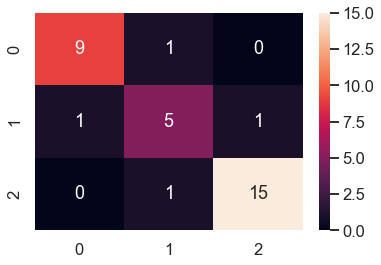

In [47]:
# Importing the required modules
import seaborn as sns
from sklearn.metrics import confusion_matrix

# passing actual and predicted values
cm10 = confusion_matrix(y_test10, y_pred10)

# true Write data values in each cell of the matrix
sns.heatmap(cm10,annot=True)
plt.savefig('confusion.png')

In [48]:
# Importing classification report
from sklearn.metrics import classification_report

# printing the report
print(classification_report(y_test10, y_pred10))


              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.71      0.71      0.71         7
           3       0.94      0.94      0.94        16

    accuracy                           0.88        33
   macro avg       0.85      0.85      0.85        33
weighted avg       0.88      0.88      0.88        33

